# Packages utiles

Comme vu dans l'introduction JULIA possède une bibliotèque de package assez grande dont il n'est pas forcément aisé dans faire le tri...

Je vous propose ici la description et utilisation de quelques classiques

En premier lieu deux packages graphiques :
* **PyPlot**
* **Gadfly**

et deux packages plus "statistiques" : 

* **DataFrmaes**
* **Rdatasets**

# Graphiques

La gestion graphique ne fait pas pertie intégrante de JULIA il faut faire appel à des packages extérieurs et on plusieurs choix possible en voici quelques uns

## PyPlot

PyPlot est basé sur une bibiliothèque éprouvée MatPlotLib (en Python). Sa syntaxe est identique à celle de MATLAB 

In [1]:
using PyPlot # nécessite d'avoir déjà fait Pkg.add("PyPlot")

INFO: Loading help data...


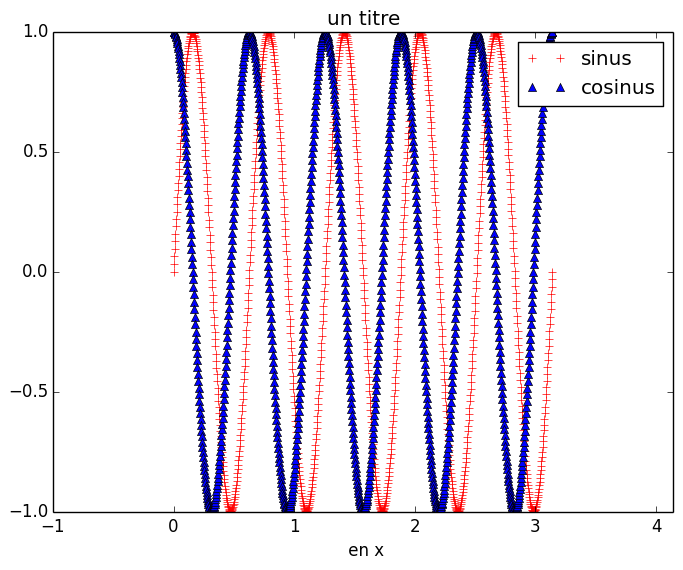

PyObject <matplotlib.legend.Legend object at 0x11e968750>

In [21]:
x=linspace(0,pi,1000);
plot(x,sin(10*x),"r+",x,cos(10*x),"b^")
title("un titre")
xlabel(" en x ") #ylabel
xlim(-1,pi+1) #ylim
legend(["sinus","cosinus"])

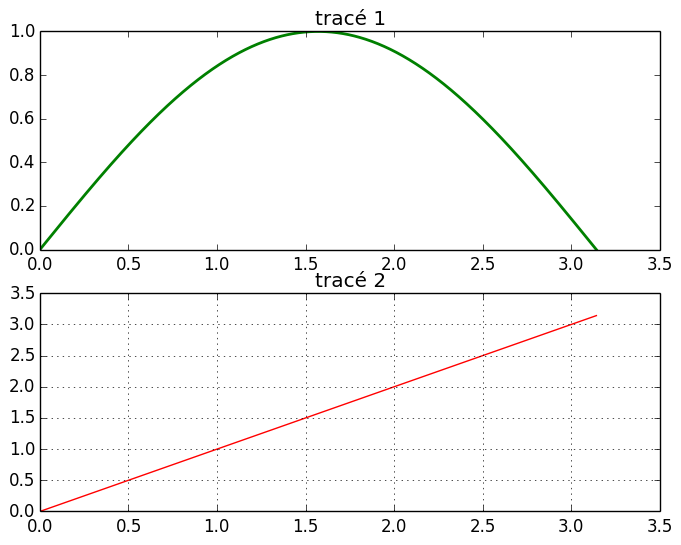

PyObject <matplotlib.text.Text object at 0x11e8285d0>

In [20]:
g=figure()
subplot(2,1,1)
plot(x,sin(x),"g",linewidth=2.0)
title("tracé 1")
subplot(2,1,2)
plot(x,x,"r")
grid(true)
title("tracé 2")

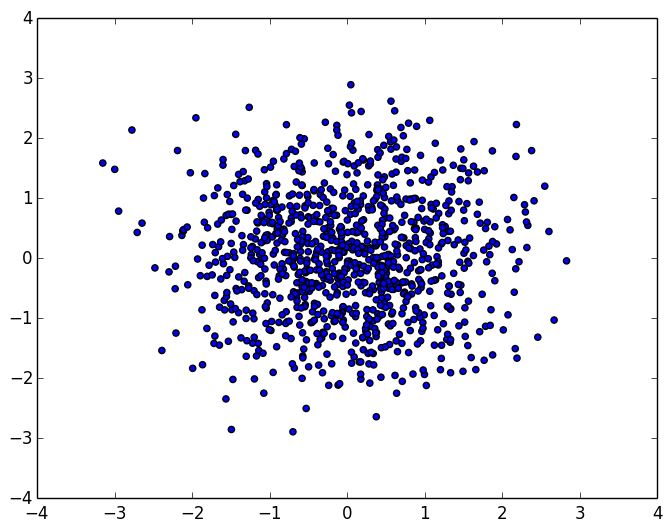

PyObject <matplotlib.collections.PathCollection object at 0x11ee23e50>

In [23]:
n=1024
X=randn(n)
Y=randn(n)
scatter(X,Y)

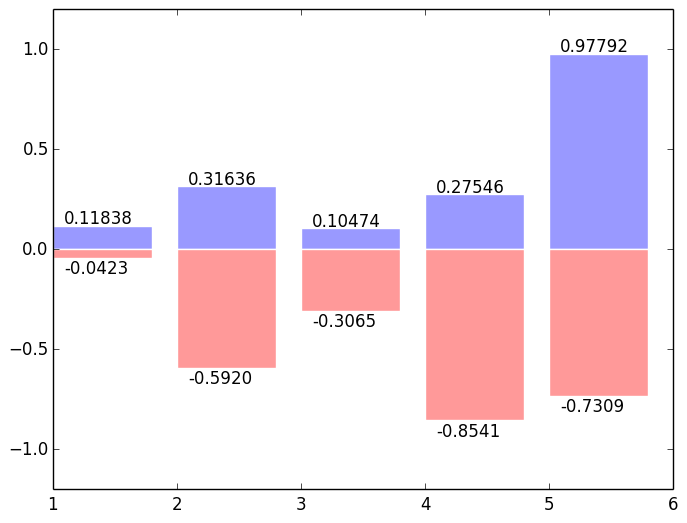

(-1.2,1.2)

In [46]:
X=rand(5)
Y=-rand(5)
bar(1:5,X,facecolor="#9999ff", edgecolor="white")
bar(1:5,Y,facecolor="#ff9999", edgecolor="white")
for i=1:5
    txt=string(X[i])
    text(i+0.1,X[i]+0.01,txt[1:7])
    txt=string(Y[i])
    text(i+0.1,Y[i]-0.08,txt[1:7])
end
ylim(-1.2,1.2)

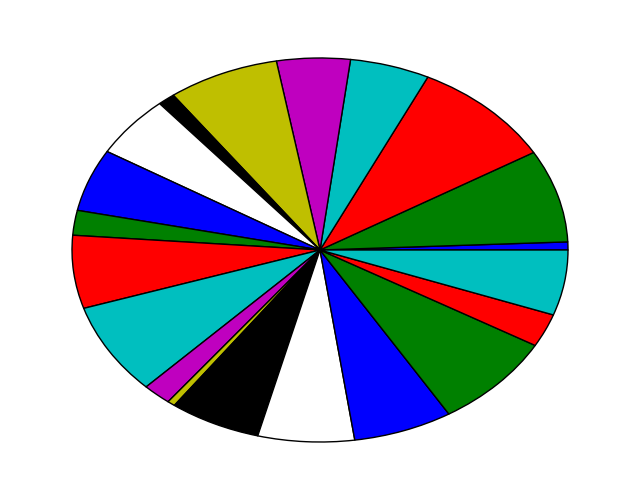

In [49]:
z=rand(20)
pie(z);

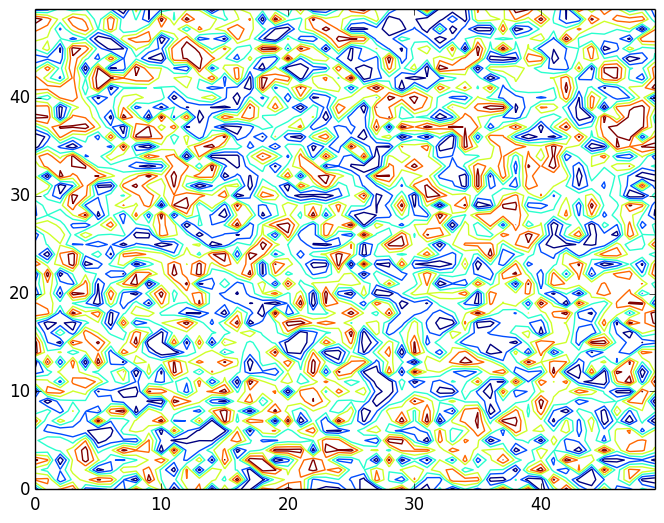

PyObject <matplotlib.contour.QuadContourSet instance at 0x11cf6e638>

In [6]:
contour(rand(50,50))

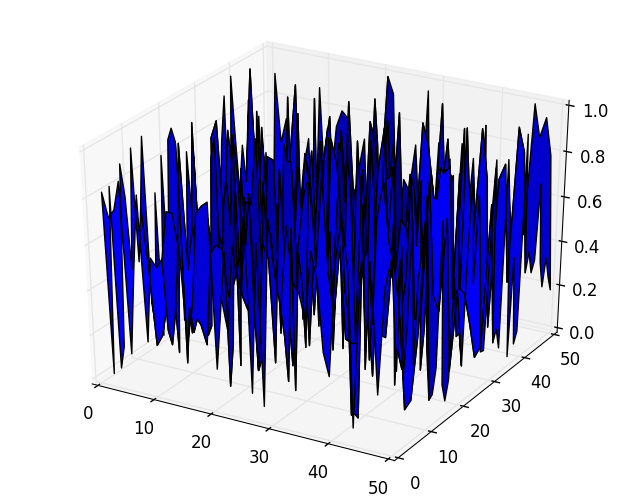

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x11fc76710>

In [67]:
surf(rand(50,50))

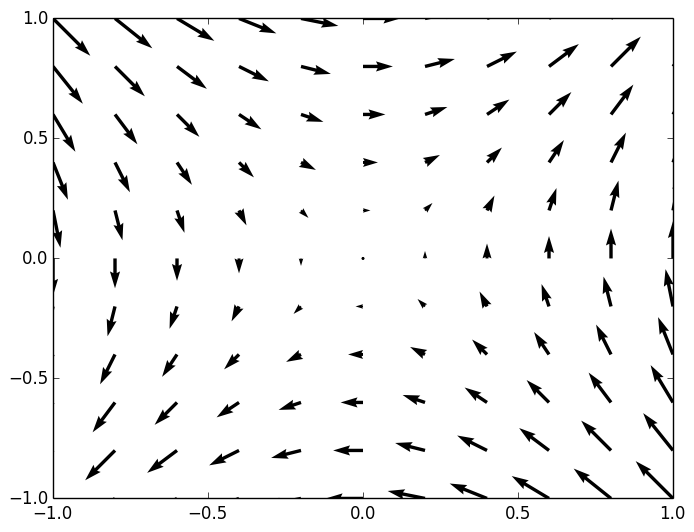

PyObject <matplotlib.quiver.Quiver object at 0x12289d0d0>

In [59]:
X=[x for x=-1:0.2:1, y=-1:0.2:1]
Y=[y for x=-1:0.2:1, y=-1:0.2:1]
quiver(-1:0.2:1,-1:0.2:1,X,Y)

## Gadfly

Gadfly est basé sur la bibliothèque ggplot2 que l'on retrouve dans R.

L'utilisation de Gafly en même temps que PyPlot peut généré des conflits sur la commande plot qui devient Gadfly.plot ou alors en relançant un nouveau kernel...

In [1]:
using Gadfly

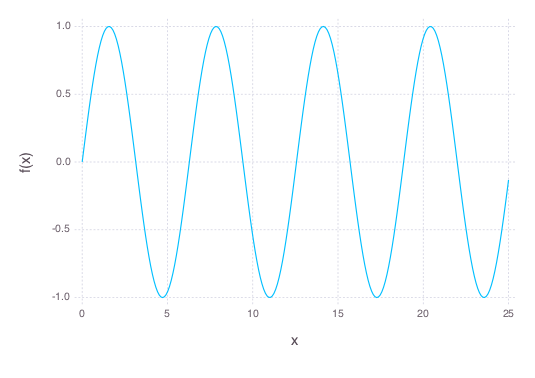

In [9]:
plot(sin,0,25)

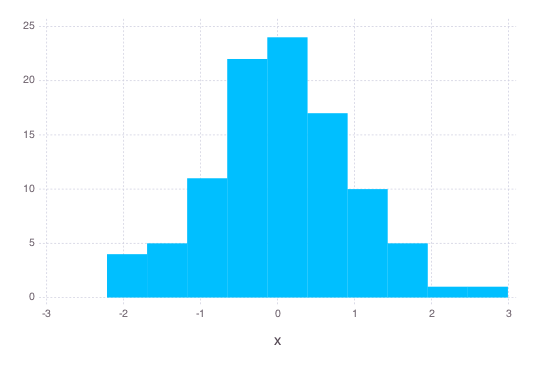

In [3]:
plot(x=randn(100), Geom.histogram(bincount=10))

In [11]:
plot(layer(sin,0,25),layer(cos,0,25))

ErrorException: The following aesthetics are required by Geom.point but are not defined: x, y


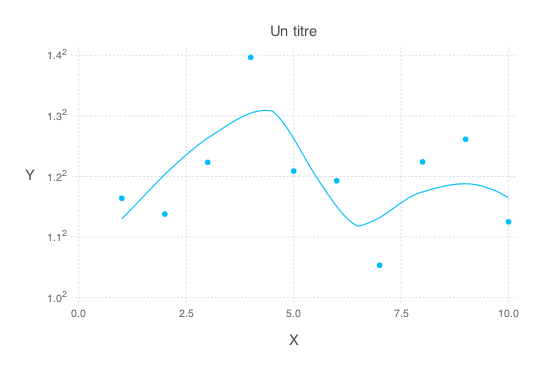

In [14]:
plot(x=1:10, y=2.^rand(10),
     Scale.y_sqrt, Geom.point, Geom.smooth,
Guide.xlabel("X"), Guide.ylabel("Y"), Guide.title("Un titre"))

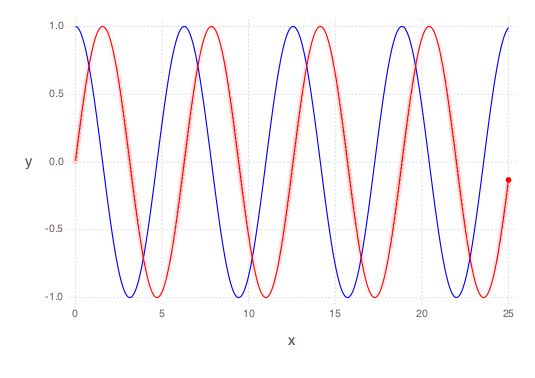

In [12]:
plot(
                  layer(x=[1:2500]/100,y=sin([1:2500]/100),
                  Geom.line,Geom.point,
                  Theme(default_color=color("red"))),

                  layer(x=[1:2500]/100,y=cos([1:2500]/100),
                  Geom.line,
                  Theme(default_color=color("blue")))
    )

D'autres packages sont disponible Winston, AsciiPlot, GLVisualize...

# DataFrames

Ce package permet de faire de la programmation en statistique.

Il introduit en autres :

* Les valeurs manquantes NA
* Le type DataArray (des Array qui peuvent contenir des NA)
* Le type DataFrame

## Type DataArray

In [19]:
using DataFrames

Création d'un DataArray incluant un NA, 

In [21]:
myda = @data([NA, 1, 2, 3, 4])

5-element DataArray{Int64,1}:
  NA
 1  
 2  
 3  
 4  

Pour pouvoir calculer une moyenne il faut régler le problèmes des NA en les enlevant :

In [18]:
dropna(myda) # on enlève les valeurs NA
mean(dropna(myda)) # on fait la moyenne

2.5

ou en les remplaçant par une valeur (ici on choisit une valeur arbitrairement mais il existe des règles de statistiques quant au choix du remplacement du NA) :

In [23]:
myda = @data([NA, 1, 2, 3, 4])
mean(convert(Array,myda, 0))

2.0

Les DataArray peuvent être vus comme des objets à N dimensions surlesquels on peut appliquer les mêmes opérations de base que sur les Array (package Base de JULIA) comme par exemple :

In [24]:
mydamult = @data([NA 0.0; 0.0 1.0])
mydamult * mydamult

2x2 DataArray{Float64,2}:
 NA   NA
 NA  1.0

## Type DataFrames

But : travailler avec des tables de données.
Ce sont des tables dont les colonnes sont des DataArray. Voici deux façons de construire des DataFrames :

In [25]:
df = DataFrame(A = 1:4, B = ["M", "F", "F", "M"])

,A,B
1,1,M
2,2,F
3,3,F
4,4,M


In [27]:
df = DataFrame()
df[:A] = 1:8;
df[:B] = ["M", "F", "F", "M", "F", "M", "M", "F"];
df

,A,B
1,1,M
2,2,F
3,3,F
4,4,M
5,5,F
6,6,M
7,7,M
8,8,F


In [28]:
nrows = size(df, 1) # nombre de ligne
ncols = size(df, 2) # nombre de colonne

2

In [34]:
head(df)#Voir le début du tableau

,A,B
1,1,M
2,2,F
3,3,F
4,4,M
5,5,F
6,6,M


In [35]:
tail(df) #Voir la fin du tableau

,A,B
1,3,F
2,4,M
3,5,F
4,6,M
5,7,M
6,8,F


In [36]:
df[1:3, :] #Voir les lignes 1,2,3 du tableau

,A,B
1,1,M
2,2,F
3,3,F


Nous avons l'analogie avec summarize du logiciel R :

In [37]:
describe(df)

A
Min      1.0
1st Qu.  2.75
Median   4.5
Mean     4.5
3rd Qu.  6.25
Max      8.0
NAs      0
NA%      0.0%

B
Length  8
Type    ASCIIString
NAs     0
NA%     0.0%
Unique  2



In [38]:
mean(df[:A])#Moyenne sur la colonne intitulée A (première colonne)

4.5

In [39]:
median(df[:A])

4.5

In [40]:
mean(df[1]) #Moyenne sur la première colonne

4.5

Pour aller plus loin dans le travail statistique sur les Dataframes il nous faut le package RDatasets qui va fournir nombres exemples et on va y retrouver beaucoup de fonctionnalités communes au logiciel R.

## RDatasets

In [44]:
using RDatasets, Gadfly

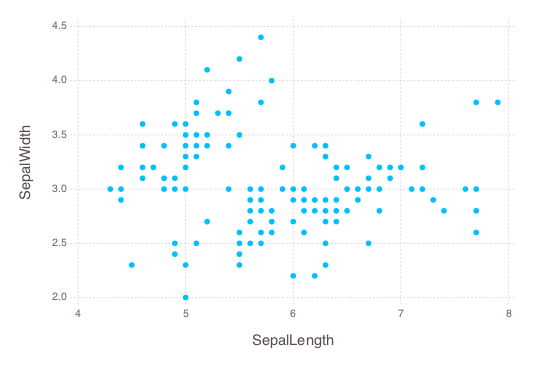

In [43]:
plot(dataset("datasets", "iris"), x="SepalLength", y="SepalWidth", Geom.point)

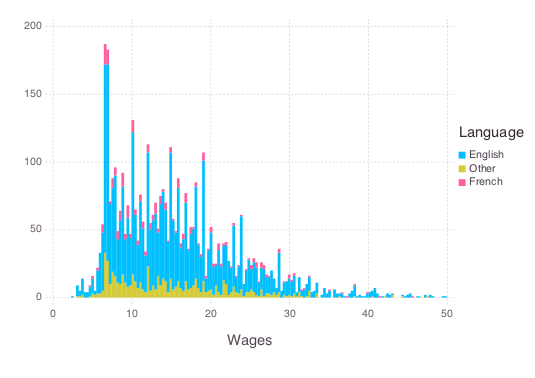

In [45]:
plot(dataset("car", "SLID"), x="Wages", color="Language", Geom.histogram)